In [1]:
import numpy as np

# Size of the grid: size
# Exponent p (eta) - in the probability formula
# Place the first virus at position x_start, y_start
def simulate(size, p, x_start, y_start):
    temp_values = []

    n = 2000 # Number of viruses
    nVirus = 1

    # Food concentration array
    C = np.zeros((size, size))
    temp = np.zeros((size, size))

    # Setting omega parameter
    w = 1.5

    # Grow array marks  locations where the viruses grow
    grow = np.zeros((size, size))
    grow[x_start, y_start] = 1

    # Setting default food
    for i in range(0, size ):
        for j in range(0, size ):
            if i == size-1:
                C[i, j] = 1
            else:
                C[i,j] = 0.001

    C[x_start, y_start] = 0

    while True:
        candidate = np.zeros((size, size))
        sumOfChance = 0
                
        # SOR method to calculate at step k+1
        for i in range(0, size):
            for j in range(0, size):
                if (i == size - 1):
                    C[i, j] = 1
                elif i == 0:
                    C[i,j] = 0;
                elif j == 0:
                    C[i, j] = (w/4) * (C[i+1, j] + C[i-1, j] 
                    + C[i, j+1] + C[i, size-1]) + (1-w) * C[i, j]
                elif j == size-1:
                    C[i, j] = (w/4) * (C[i+1, j] + C[i-1, j] 
                    + C[i, 0] + C[i, j-1]) + (1-w) * C[i, j]
                else:
                    C[i, j] = (w/4) * (C[i+1, j] + C[i-1, j] 
                    + C[i, j+1] + C[i, j-1]) + (1-w) * C[i, j]

        # Find candidates
        for i in range(0, size ): 
            for j in range(0, size ):
                if grow[i, j] == 1:
                    C[i, j] = 0  
                    if i == 0:
                        if grow[0, j] == 0 and candidate[0, j] == 0:
                            candidate[0, j] = 1
                        if grow[i+1, j] == 0 and candidate[i+1, j] == 0:
                            candidate[i+1, j] = 1
                        if grow[i, j-1] == 0 and candidate[i, j-1] == 0:
                            candidate[i, j-1] = 1
                        if grow[i, j+1] == 0 and candidate[i, j+1] == 0:
                            candidate[i, j+1] = 1
                    elif i == size-1:
                        if grow[i-1, j] == 0 and candidate[i-1, j] == 0:
                            candidate[i-1, j] = 1
                        if grow[size-1, j] == 0 and candidate[size-1, j] == 0:
                            candidate[0, j] = 1
                        if grow[i, j-1] == 0 and candidate[i, j-1] == 0:
                            candidate[i, j-1] = 1
                        if grow[i, j+1] == 0 and candidate[i, j+1] == 0:
                            candidate[i, j+1] = 1
                    elif j == 0:
                        if grow[i-1, j] == 0 and candidate[i-1, j] == 0:
                            candidate[i-1, j] = 1
                        if grow[i+1, j] == 0 and candidate[i+1, j] == 0:
                            candidate[i+1, j] = 1
                        if grow[i, size-1] == 0 and candidate[i, size-1] == 0:
                            candidate[i, size-1] = 1
                        if grow[i, j+1] == 0 and candidate[i, j+1] == 0:
                            candidate[i, j+1] = 1
                    elif j == size-1:
                        if grow[i-1, j] == 0 and candidate[i-1, j] == 0:
                            candidate[i-1, j] = 1
                        if grow[i+1, j] == 0 and candidate[i+1, j] == 0:
                            candidate[i+1, j] = 1
                        if grow[i, j-1] == 0 and candidate[i, j-1] == 0:
                            candidate[i, j-1] = 1
                        if grow[i, 0] == 0 and candidate[i, 0] == 0:
                            candidate[i, 0] = 1
                    else:
                        if grow[i-1, j] == 0 and candidate[i-1, j] == 0:
                            candidate[i-1, j] = 1
                        if grow[i+1, j] == 0 and candidate[i+1, j] == 0:
                            candidate[i+1, j] = 1
                        if grow[i, j-1] == 0 and candidate[i, j-1] == 0:
                            candidate[i, j-1] = 1
                        if grow[i, j+1] == 0 and candidate[i, j+1] == 0:
                            candidate[i, j+1] = 1

        # Calculate the denominator of P
        for i in range(0, size ):
            for j in range(0, size ):
                if candidate[i, j] == 1:
                    sumOfChance += C[i, j]**p

        # Random grow
        for i in range(0, size ):
            for j in range(0, size ):
                if candidate[i, j] == 1:
                    randPos = np.random.rand() / 10
                    curChance = (C[i, j]**p) / sumOfChance
                    if randPos < curChance:
                        grow[i, j] = 1
                        if nVirus < n:
                            nVirus += 1
                            
        temp_values.append(grow.copy())
        print(nVirus, end="\r")
        
        if nVirus == n:
            return temp_values
            break

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
        
def run_sim(size = 201, p = 2, x_start = 2, y_start = 100, name = ''):
    filename = '{0}x{0}p{1}plot{2}'.format(size-1, p, name)
    try:
        # Load the array from the file if exist
        temp_values = np.load('data/' + filename + '.npy')
    except FileNotFoundError:
        temp_values = simulate(size, p, x_start, y_start)
        np.save('data/' + filename + '.npy', temp_values)

    temp = temp_values[-1]
    
    x = np.arange(size)
    y = np.arange(size)
    X, Y = np.meshgrid(x, y)

    fig, (ax, ax_top) = plt.subplots(1, 2, figsize=(10, 5)
                        , subplot_kw={'projection': '3d'})
    ax.plot_surface(X, Y, temp, cmap='jet')
    ax.view_init(azim=-120, elev=30)
    
    ax_top.contourf(X, Y, temp, cmap='jet')
    ax_top.view_init(azim=-90, elev=90)
    ax_top.set_zticks([])
    
    plt.savefig(filename + '.png', transparent=True)
    plt.show(block=False)
    
# Make directory
import os
path = "data"
# Check whether the specified path exists or not
isExist = os.path.exists(path)
if not isExist:
   os.makedirs(path)

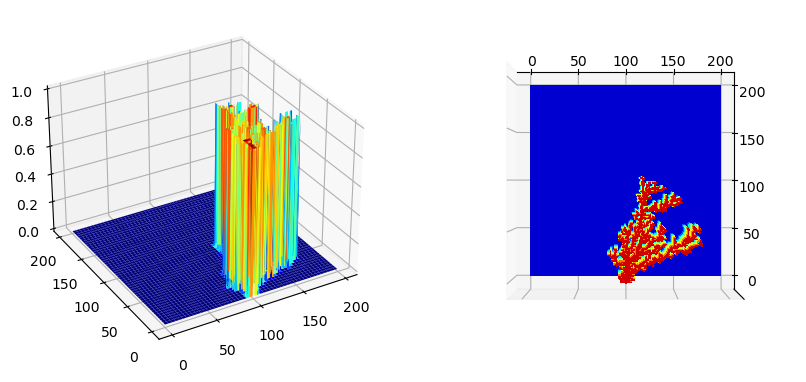

In [2]:
run_sim(size = 200, p = 2, x_start = 0, y_start = 100, name = 't13')

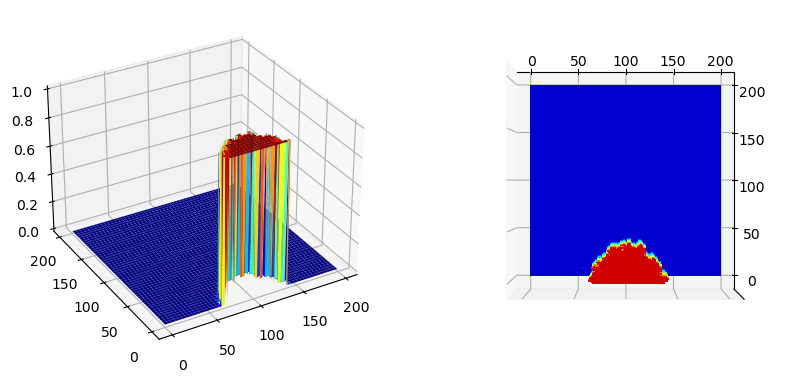

In [3]:
run_sim(size = 200, p = 0, x_start = 0, y_start = 100, name = 't15')

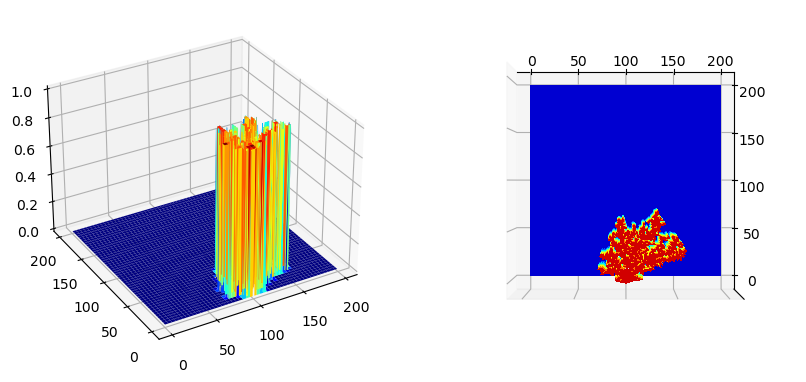

In [4]:
run_sim(size = 200, p = 1, x_start = 0, y_start = 100, name = 't16')

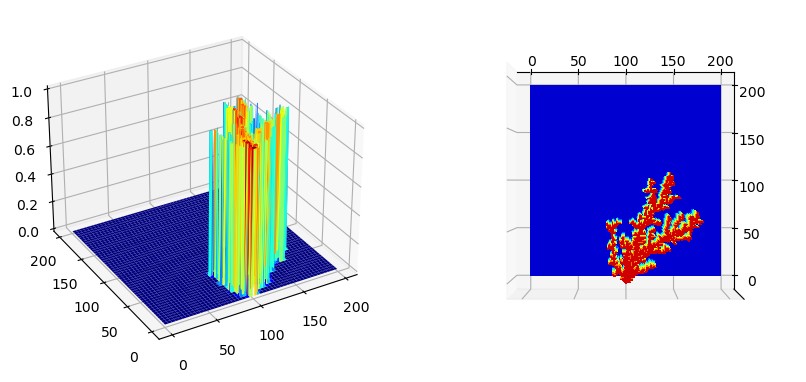

In [5]:
run_sim(size = 200, p = 2, x_start = 0, y_start = 100, name = 't17')

C:\Users\vuduc\AppData\Local\Temp\ipykernel_18140\1220793634.py:109: RuntimeWarning: invalid value encountered in double_scalars
  sumOfChance += C[i, j]**p
C:\Users\vuduc\AppData\Local\Temp\ipykernel_18140\1220793634.py:116: RuntimeWarning: invalid value encountered in double_scalars
  curChance = (C[i, j]**p) / sumOfChance


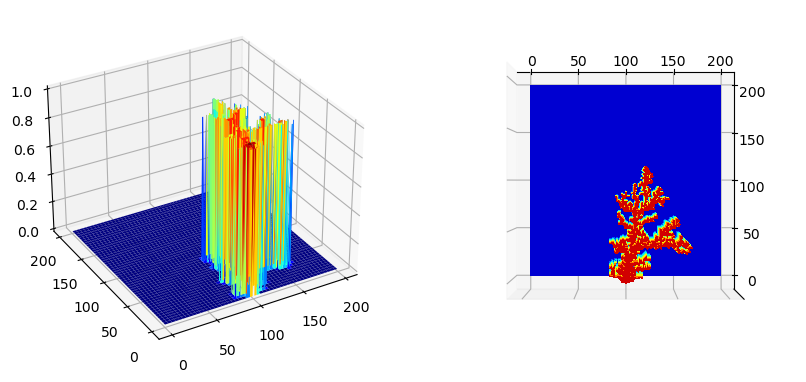

In [6]:
run_sim(size = 200, p = 1.5, x_start = 0, y_start = 100, name = 't18')

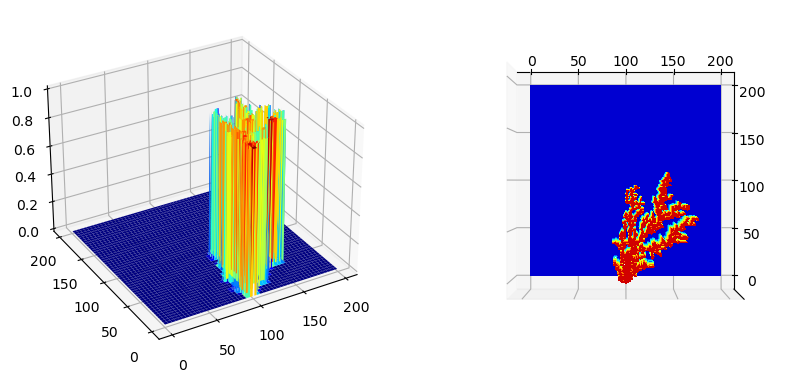

In [7]:
run_sim(size = 200, p = 2, x_start = 0, y_start = 100, name = 't19')